In [4]:
import matplotlib.pyplot as plt
import cfe.regression as rgsn
import numpy as np
import matplotlib.cm
from scipy.stats import gaussian_kde as kde
from cfe.df_utils import use_indices

In [5]:
#data load
r = rgsn.read_pickle('./data/preferred.rgsn')


In [45]:
#data prep
# was 99th quantile, acutally the highest total expenditures
x99 = xbar.quantile(1)

Y = np.geomspace(1,x99,100)#geomspace(start, stop, num=50, endpoint=True, dtype=None, axis=0)

In [ ]:
#imports
#bring in some data and typecast to a pandas series
#f is 
#um something about the mean being assigned to p

In [7]:
# what does this do???
p = ((r.y.unstack('j')>0) + 0.).mean()

In [34]:
print((r.y.unstack('j')>0 +0.).mean())
print(r.expenditures(Y[-1]))

j
Beans              0.832267
Beef               0.363600
Beer               0.068178
Bottled Drinks     0.170622
Buns               0.235644
Butter, etc.       0.036178
Cabbages           0.293422
Cassava (flour)    0.236000
Chicken            0.113200
Cigarettes         0.055689
Coffee             0.059378
Cooking Oil        0.705378
Dodo               0.443067
Eggs               0.164800
Fish (dried)       0.253289
Fish (fresh)       0.275156
Goat               0.082311
Irish Potatoes     0.151733
Maize              0.683689
Mangos             0.171956
Matoke             0.518667
Millet             0.187644
Onions             0.822356
Oranges            0.104578
Other Alcohol      0.159200
Other Fruit        0.375156
Other Juice        0.024044
Other Veg.         0.505867
Passion Fruit      0.104444
Peas               0.106489
Pork               0.079733
Restaurant         0.164444
Rice               0.327422
Salt               0.982000
Sim Sim            0.123956
Sorghum           

In [8]:
def circle(r):
    angles = np.linspace(0,2*np.pi,100)
    return r*np.cos(angles),r*np.sin(angles)

def point_on_circle(theta,r):
    return r*np.cos(theta),r*np.sin(theta)

Text(1, 0, '$\\log x$')

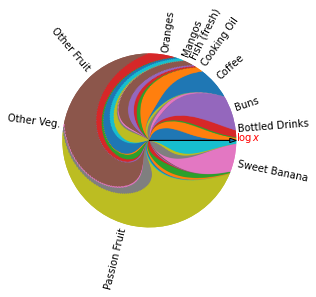

In [10]:
fig,ax = plt.subplots()

# Select labels that will fit
shares = r.expenditures(Y[-1])*p
shares = shares/shares.sum()
labels = use_indices(shares,['j'])
labels['shares'] = shares
labels = labels.j.where(labels.shares>0.01,'').tolist()

ax.pie(shares,labels=labels,rotatelabels=True,labeldistance=1.02)

for i in range(len(Y)-1,0,-1):
    ax.pie(r.expenditures(Y[i])*p,radius=np.log(Y[i])/np.log(x99))

ax.arrow(0,0,1,0,shape='full',head_width=.05,length_includes_head=True)
ax.annotate(r"$\log x$", xy=(1,0),color='red')

In [12]:
ax.plot(*circle(np.log(xbar.quantile(0.01))/np.log(x99)),'k')
ax.plot(*circle(np.log(xbar.quantile(0.5))/np.log(x99)),'k')
ax.plot(*circle(np.log(xbar.quantile(0.99))/np.log(x99)),'k')

ax.annotate("99%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.99))/np.log(x99)), xytext=(.9, 1.1), arrowprops=dict(arrowstyle="->"))
ax.annotate("Median", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.5))/np.log(x99)), xytext=(1, 1), arrowprops=dict(arrowstyle="->"))
ax.annotate("1%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.01))/np.log(x99)), xytext=(1.1, 0.9), arrowprops=dict(arrowstyle="->"))

Text(1.1, 0.9, '1%')

In [13]:
ax.get_figure().savefig('./out/engel_pie-0.png')

In [44]:
def make_engel_pie(r: rgsn.Regression) -> plt.Axes:
    def circle(r):
        angles = np.linspace(0,2*np.pi,100)
        return r*np.cos(angles),r*np.sin(angles)

    def point_on_circle(theta,r):
        return r*np.cos(theta),r*np.sin(theta)    
    
    xbar = r.predicted_expenditures().groupby(['i','t','m']).sum()
    x99 = xbar.quantile(1)
    Y = np.geomspace(1,x99,100)    
    p = ((r.y.unstack('j')>0) + 0.).mean()
    fig,ax = plt.subplots()
    
    shares = r.expenditures(Y[-1])*p
    shares = shares/shares.sum()
    labels = use_indices(shares,['j'])
    labels['shares'] = shares
    labels = labels.j.where(labels.shares>0.01,'').tolist()

    ax.pie(shares,labels=labels,rotatelabels=True,labeldistance=1.02)

    for i in range(len(Y)-1,0,-1):
        ax.pie(r.expenditures(Y[i])*p,radius=np.log(Y[i])/np.log(x99))

    ax.arrow(0,0,1,0,shape='full',head_width=.05,length_includes_head=True)
    ax.annotate(r"$\log x$", xy=(1,0),color='red')    
    
    ax.plot(*circle(np.log(xbar.quantile(0.01))/np.log(x99)),'k')
    ax.plot(*circle(np.log(xbar.quantile(0.5))/np.log(x99)),'k')
    ax.plot(*circle(np.log(xbar.quantile(0.99))/np.log(x99)),'k')

    ax.annotate("99%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.99))/np.log(x99)), xytext=(.9, 1.1), arrowprops=dict(arrowstyle="->"))
    ax.annotate("Median", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.5))/np.log(x99)), xytext=(1, 1), arrowprops=dict(arrowstyle="->"))
    ax.annotate("1%", xy=point_on_circle(np.pi/3,np.log(xbar.quantile(0.01))/np.log(x99)), xytext=(1.1, 0.9), arrowprops=dict(arrowstyle="->"))    
    
    return ax

In [90]:
x1=np.log(xbar.quantile(0.99))/np.log(x99)
x2=np.log(xbar.quantile(0.01))/np.log(x99)

xy1=point_on_circle(np.pi-np.cos(0.1*x1),x1)
xy1=(xy1[0],xy1[1]-.1)
xy1

(-0.4416286057643224, 0.582822176817965)

In [70]:
xy2=point_on_circle(np.pi,np.log(xbar.quantile(0.5))/np.log(x99))
xy2

(-0.6802106960902015, 8.330178517126582e-17)

In [91]:
xy3=point_on_circle(np.pi+np.cos(0.1*x2),x2)
xy3=(xy3[0],xy3[1]-.1)
xy3

(-0.31451907077958946, -0.5880238042881503)

In [50]:
np.pi-np.sin(0.1*x1)

3.060363004499307

In [93]:
np.isclose(np.average([xy1[1],xy3[1]]),xy2[1])


False

In [94]:
x1

0.8131924437571734